# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

#create list to add data and set count to 0
weather_list = []
count = 0

for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city +"&units=imperial"
    weather_response = requests.get(query_url)
    data = weather_response.json()
    lat = None
    lng = None
    max_temp = None
    humidity = None
    cloud = None
    wind_speed = None
    country = ''
    try:
        lat = data['coord']['lat']
        lng = data['coord']['lon']
        max_temp = data['main']['temp_max']
        humidity = data['main']['humidity']
        cloud = data['clouds']['all']
        wind_speed = data['wind']['speed']
        country = data['sys']['country']
        date = data['dt']
        row_info = [city,lat,lng,max_temp,humidity,cloud,wind_speed,country,date]
        print(f'Adding city {count}: {city}. Status: {weather_response}')
        weather_list.append(row_info)
    except:
        print(f'Error adding city {count}: {city}')
    count += 1
weather_list


Adding city 0: baykit. Status: <Response [200]>
Adding city 1: walvis bay. Status: <Response [200]>
Adding city 2: talnakh. Status: <Response [200]>
Adding city 3: qaanaaq. Status: <Response [200]>
Adding city 4: longyearbyen. Status: <Response [200]>
Adding city 5: hithadhoo. Status: <Response [200]>
Adding city 6: rikitea. Status: <Response [200]>
Adding city 7: ambilobe. Status: <Response [200]>
Adding city 8: yerbogachen. Status: <Response [200]>
Adding city 9: busselton. Status: <Response [200]>
Adding city 10: caravelas. Status: <Response [200]>
Adding city 11: torbay. Status: <Response [200]>
Adding city 12: riyadh. Status: <Response [200]>
Adding city 13: jutai. Status: <Response [200]>
Adding city 14: georgetown. Status: <Response [200]>
Adding city 15: koumac. Status: <Response [200]>
Adding city 16: bandarbeyla. Status: <Response [200]>
Error adding city 17: rungata
Adding city 18: vao. Status: <Response [200]>
Adding city 19: barrow. Status: <Response [200]>
Adding city 20:

Adding city 165: arraial do cabo. Status: <Response [200]>
Adding city 166: hilo. Status: <Response [200]>
Adding city 167: airai. Status: <Response [200]>
Adding city 168: codrington. Status: <Response [200]>
Adding city 169: sesheke. Status: <Response [200]>
Adding city 170: klaksvik. Status: <Response [200]>
Adding city 171: saint-augustin. Status: <Response [200]>
Adding city 172: genhe. Status: <Response [200]>
Adding city 173: wajima. Status: <Response [200]>
Error adding city 174: attawapiskat
Adding city 175: kota kinabalu. Status: <Response [200]>
Adding city 176: komsomolskiy. Status: <Response [200]>
Adding city 177: akhaldaba. Status: <Response [200]>
Adding city 178: san andres. Status: <Response [200]>
Adding city 179: fairbanks. Status: <Response [200]>
Adding city 180: makakilo city. Status: <Response [200]>
Adding city 181: north bend. Status: <Response [200]>
Adding city 182: beni. Status: <Response [200]>
Adding city 183: hibbing. Status: <Response [200]>
Adding city

Adding city 324: kieta. Status: <Response [200]>
Adding city 325: humberto de campos. Status: <Response [200]>
Adding city 326: liuhe. Status: <Response [200]>
Error adding city 327: warqla
Adding city 328: lampazos de naranjo. Status: <Response [200]>
Adding city 329: sitka. Status: <Response [200]>
Error adding city 330: samusu
Adding city 331: sorland. Status: <Response [200]>
Adding city 332: coquimbo. Status: <Response [200]>
Adding city 333: saint george. Status: <Response [200]>
Adding city 334: boende. Status: <Response [200]>
Adding city 335: awjilah. Status: <Response [200]>
Adding city 336: manokwari. Status: <Response [200]>
Adding city 337: kamenka. Status: <Response [200]>
Error adding city 338: belushya guba
Adding city 339: kalispell. Status: <Response [200]>
Adding city 340: the valley. Status: <Response [200]>
Adding city 341: puerto escondido. Status: <Response [200]>
Adding city 342: ust-tsilma. Status: <Response [200]>
Adding city 343: humble. Status: <Response [20

Adding city 484: balkhash. Status: <Response [200]>
Adding city 485: inverell. Status: <Response [200]>
Error adding city 486: tumannyy
Error adding city 487: ozgon
Adding city 488: kamloops. Status: <Response [200]>
Adding city 489: tuatapere. Status: <Response [200]>
Adding city 490: banikoara. Status: <Response [200]>
Adding city 491: mayumba. Status: <Response [200]>
Adding city 492: usogorsk. Status: <Response [200]>
Adding city 493: laela. Status: <Response [200]>
Adding city 494: yar-sale. Status: <Response [200]>
Adding city 495: turukhansk. Status: <Response [200]>
Adding city 496: palana. Status: <Response [200]>
Adding city 497: whitehorse. Status: <Response [200]>
Adding city 498: barra do garcas. Status: <Response [200]>
Adding city 499: ronne. Status: <Response [200]>
Adding city 500: benghazi. Status: <Response [200]>
Adding city 501: staraya russa. Status: <Response [200]>
Adding city 502: dunedin. Status: <Response [200]>
Adding city 503: chifeng. Status: <Response [20

[['baykit', 61.67, 96.37, 72.27, 50, 8, 5.48, 'RU', 1624151612],
 ['walvis bay', -22.9575, 14.5053, 65.17, 52, 3, 3.85, 'NA', 1624151612],
 ['talnakh', 69.4865, 88.3972, 48.63, 90, 100, 2.86, 'RU', 1624151613],
 ['qaanaaq', 77.484, -69.3632, 38.53, 58, 8, 2.55, 'GL', 1624151613],
 ['longyearbyen', 78.2186, 15.6401, 40.84, 75, 75, 20.71, 'SJ', 1624151613],
 ['hithadhoo', -0.6, 73.0833, 83.62, 68, 83, 13.11, 'MV', 1624151614],
 ['rikitea', -23.1203, -134.9692, 75.33, 76, 0, 18.16, 'PF', 1624151614],
 ['ambilobe', -13.2, 49.05, 67.03, 82, 51, 3.96, 'MG', 1624151614],
 ['yerbogachen', 61.2767, 108.0108, 65.21, 68, 98, 3.83, 'RU', 1624151615],
 ['busselton', -33.65, 115.3333, 55.09, 85, 24, 10.89, 'AU', 1624151615],
 ['caravelas', -17.7125, -39.2481, 72.66, 70, 100, 9.17, 'BR', 1624151615],
 ['torbay', 47.6666, -52.7314, 58.87, 87, 100, 8.19, 'CA', 1624151616],
 ['riyadh', 24.6877, 46.7219, 78.94, 18, 0, 5.75, 'SA', 1624151364],
 ['jutai', -5.1833, -68.9, 72.3, 96, 33, 2.62, 'BR', 162415161

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame(weather_list,columns=['City','Lat','Lng','Max_Temp','Humidity','Cloudiness','Wind_Speed','Country','Date'])

weather_df.to_csv(r'./Output/city_weather.csv',index=False)
weather_df

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,baykit,61.6700,96.3700,72.27,50,8,5.48,RU,1624151612
1,walvis bay,-22.9575,14.5053,65.17,52,3,3.85,NA,1624151612
2,talnakh,69.4865,88.3972,48.63,90,100,2.86,RU,1624151613
3,qaanaaq,77.4840,-69.3632,38.53,58,8,2.55,GL,1624151613
4,longyearbyen,78.2186,15.6401,40.84,75,75,20.71,SJ,1624151613
...,...,...,...,...,...,...,...,...,...
574,bilibino,68.0546,166.4372,53.78,59,100,2.68,RU,1624151786
575,pitimbu,-7.4706,-34.8086,72.19,85,62,12.48,BR,1624151786
576,khoy,38.5504,44.9535,67.06,42,0,1.63,IR,1624151786
577,mastic beach,40.7668,-72.8521,70.32,90,90,7.00,US,1624151787


In [5]:
weather_df.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,21.176407,20.181547,68.087547,69.763385,57.259067,7.814870,1.624152e+09
std,32.775474,91.011162,13.759481,21.661783,41.436263,5.343685,7.965719e+01
min,-54.800000,-179.166700,28.150000,7.000000,0.000000,0.000000,1.624151e+09
25%,-4.350700,-60.210900,57.965000,59.500000,9.000000,3.520000,1.624152e+09
50%,25.519800,24.074000,69.530000,75.000000,74.000000,6.550000,1.624152e+09
75%,47.546900,101.900700,78.950000,85.000000,100.000000,10.815000,1.624152e+09
max,78.218600,179.316700,108.630000,100.000000,100.000000,29.970000,1.624152e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#for the current data set, there are none, but I included this code anyway
if weather_df['Humidity'].max() > 100:
    weather_df = weather_df.drop(weather_df[weather_df.Humidity > 100].index)
clean_city_data = weather_df
clean_city_data.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,21.176407,20.181547,68.087547,69.763385,57.259067,7.814870,1.624152e+09
std,32.775474,91.011162,13.759481,21.661783,41.436263,5.343685,7.965719e+01
min,-54.800000,-179.166700,28.150000,7.000000,0.000000,0.000000,1.624151e+09
25%,-4.350700,-60.210900,57.965000,59.500000,9.000000,3.520000,1.624152e+09
50%,25.519800,24.074000,69.530000,75.000000,74.000000,6.550000,1.624152e+09
75%,47.546900,101.900700,78.950000,85.000000,100.000000,10.815000,1.624152e+09
max,78.218600,179.316700,108.630000,100.000000,100.000000,29.970000,1.624152e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
#there are none, because I removed them in the previous step

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#this was done in one step above using DataFrame.drop()

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

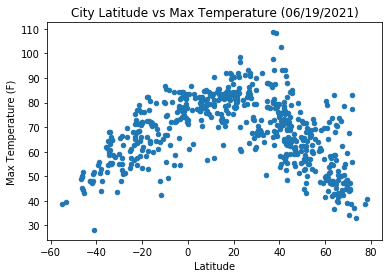

In [38]:
clean_city_data.plot.scatter(x='Lat',y='Max_Temp')
plt.title('City Latitude vs Max Temperature (06/19/2021)')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.savefig('./Output/Latitude_vs_Temp.png')
plt.show()

## Latitude vs. Humidity Plot

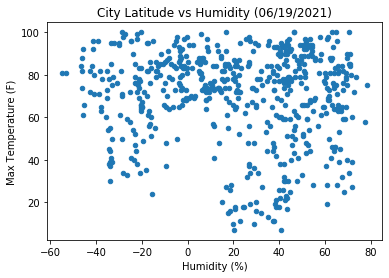

In [39]:
clean_city_data.plot.scatter(x='Lat',y='Humidity')
plt.title('City Latitude vs Humidity (06/19/2021)')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Humidity (%)')
plt.savefig('./Output/Latitude_vs_Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

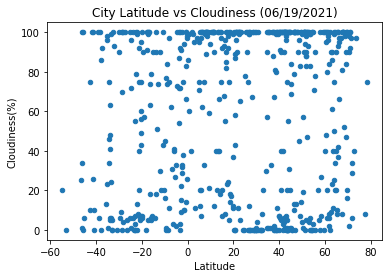

In [40]:
clean_city_data.plot.scatter(x='Lat',y='Cloudiness')
plt.title('City Latitude vs Cloudiness (06/19/2021)')
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')
plt.savefig('./Output/Latitude_vs_Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

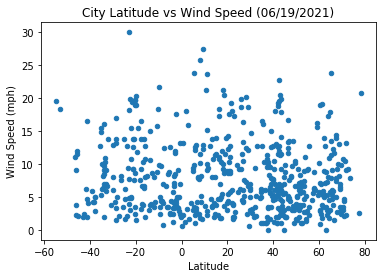

In [41]:
clean_city_data.plot.scatter(x='Lat',y='Wind_Speed')
plt.title('City Latitude vs Wind Speed (06/19/2021)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.savefig('./Output/Latitude_vs_Wind.png')
plt.show()

## Linear Regression

In [27]:
north_df = clean_city_data.drop(clean_city_data[clean_city_data.Lat < 0].index)
south_df = clean_city_data.drop(clean_city_data[clean_city_data.Lat > 0].index)
north_df

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,baykit,61.6700,96.3700,72.27,50,8,5.48,RU,1624151612
2,talnakh,69.4865,88.3972,48.63,90,100,2.86,RU,1624151613
3,qaanaaq,77.4840,-69.3632,38.53,58,8,2.55,GL,1624151613
4,longyearbyen,78.2186,15.6401,40.84,75,75,20.71,SJ,1624151613
8,yerbogachen,61.2767,108.0108,65.21,68,98,3.83,RU,1624151615
...,...,...,...,...,...,...,...,...,...
573,bamako,12.6500,-8.0000,75.61,94,20,4.61,ML,1624151782
574,bilibino,68.0546,166.4372,53.78,59,100,2.68,RU,1624151786
576,khoy,38.5504,44.9535,67.06,42,0,1.63,IR,1624151786
577,mastic beach,40.7668,-72.8521,70.32,90,90,7.00,US,1624151787


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

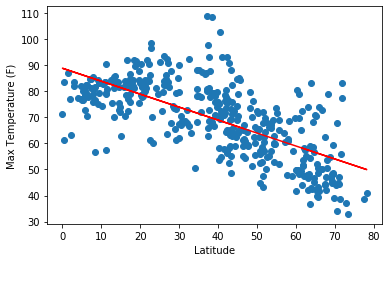

In [43]:
x_values = north_df['Lat']
y_values = north_df['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('./Output/Latitude_vs_Temp_north.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

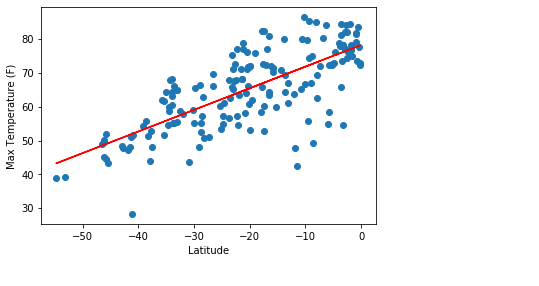

In [44]:
x_values = south_df['Lat']
y_values = south_df['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('./Output/Latitude_vs_Temp_south.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

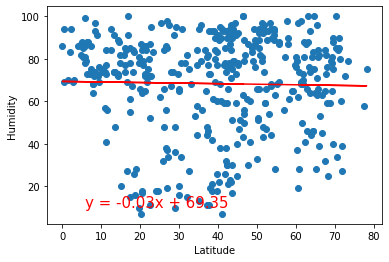

In [45]:
x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('./Output/Latitude_vs_Humidity_north.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

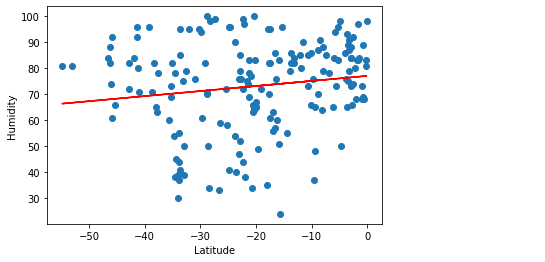

In [46]:
x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('./Output/Latitude_vs_Humidity_south.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

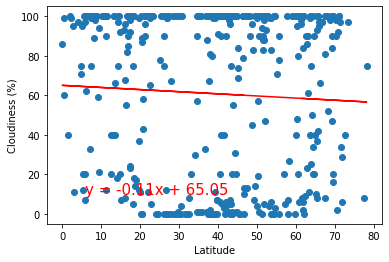

In [47]:
x_values = north_df['Lat']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('./Output/Latitude_vs_Cloudiness_north.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

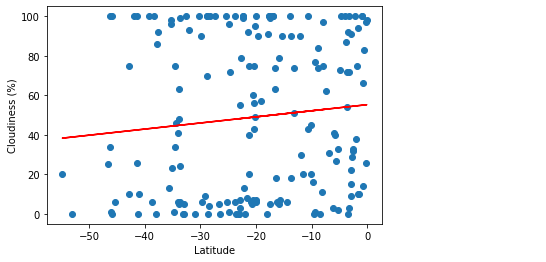

In [48]:
x_values = south_df['Lat']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('./Output/Latitude_vs_Cloudiness_south.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

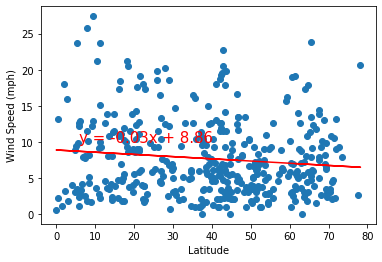

In [49]:
x_values = north_df['Lat']
y_values = north_df['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('./Output/Latitude_vs_Wind_north.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

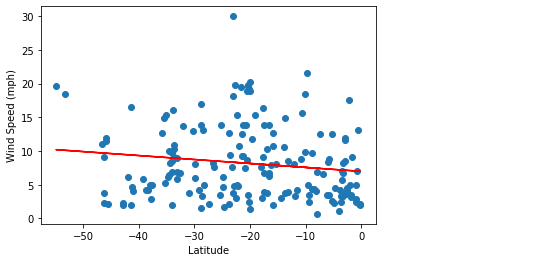

In [50]:
x_values = south_df['Lat']
y_values = south_df['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('./Output/Latitude_vs_Wind_south.png')
plt.show()